# The Sparks Foundation -Data Science and Business Analytics Internship

# Author-Aditi Ahuja

# Task 1:Prediction using Supervised Machine Learning 

In this task we have to predict the percentage score of a student based on the number of hours studied.The task has two variables where the feature is the no. of hours studied and target value is the percentage score.This can be solved using linear regression.

# Importing the Dataset

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np 
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
#reading data from given link
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)


In [3]:
#Explore the data
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
print(df.shape)

(25, 2)


In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
#checking if there is any null value or missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

here we can see we do not have any null values.

# Visualizing the Dataset

<Figure size 700x500 with 0 Axes>

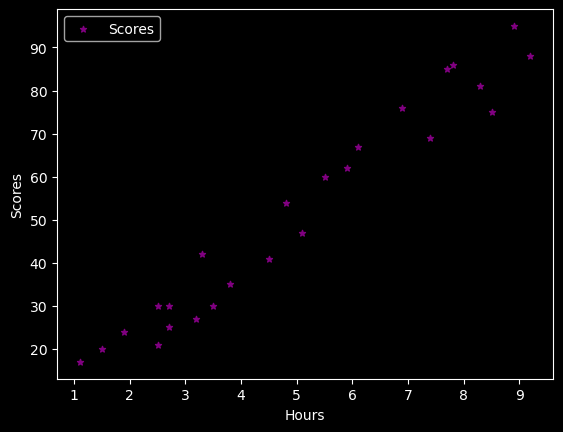

In [6]:
#PLoting the dataset
plt.figure(figsize=(7,5))
df.plot(kind='scatter',x="Hours",y="Scores",marker='*',color='purple',label="Scores")
style.use('dark_background')
plt.legend()
plt.show()

From the graph we predict there is a linear relationship "hours" and "scores" .So,we can use the linear regression supervised machine learning model for predictiong furture values.

In [10]:
#we can also use corr method to find the corelation between the variables.
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation

Here we are going test and train data sets

In [11]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
#Dividing the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:,1:].values 

In [13]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [15]:
#In this data into training and test sets. We'll do this by using SkLearn built-in train_test_split() method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10) 

# Training the Model

We have splitted our data sets into training and test sets now will train our model.

In [16]:
from sklearn.linear_model import LinearRegression  
clf = LinearRegression()  
clf.fit(X_train, y_train) 


LinearRegression()

# Visualize the Model

After training we have to visualize the model

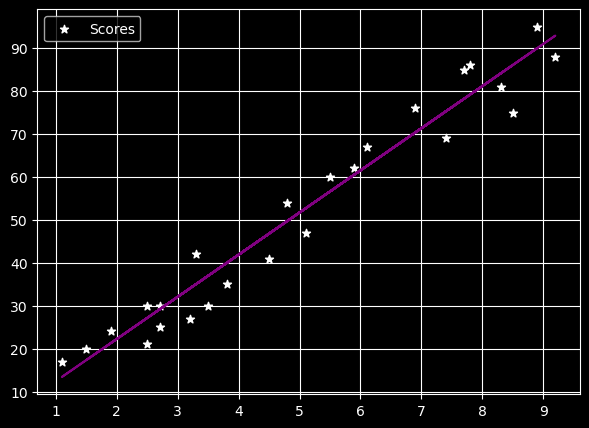

In [17]:
# Plotting the regression line
line = clf.coef_*X+clf.intercept_
# Plotting for the test data
plt.figure(figsize=(7,5))
plt.scatter(X, y,marker='*',color='white',label="Scores")
plt.plot(X, line,color='purple');
plt.xlabel=('Hours')
plt.ylabel=('Scores')
plt.grid()
plt.legend()
plt.show()



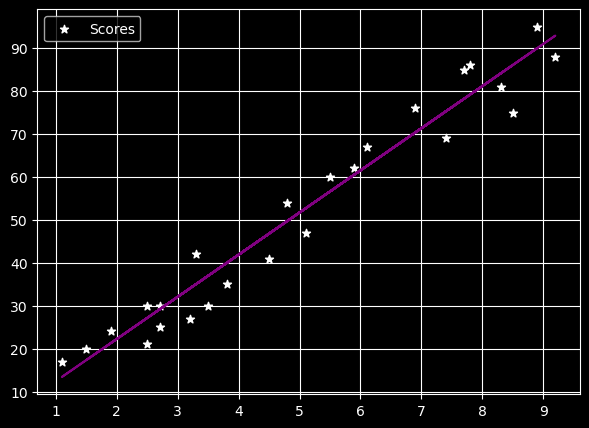

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(X, y,marker='*',color='white',label="Scores")
plt.plot(X, line,color='purple');
plt.grid()
plt.legend()
plt.show()


# Making Predictions

In [19]:
print(X_test)#testing Data -In Hours
pred= clf.predict(X_test) #Predicting the Scores

[[1.5]
 [5.1]
 [3.3]
 [3.2]
 [4.5]]


In [20]:
print(pred)

[[17.37142335]
 [52.70292295]
 [35.03717315]
 [34.05574261]
 [46.81433968]]


In [21]:
y_test

array([[20],
       [47],
       [42],
       [27],
       [41]], dtype=int64)

In [22]:
#Comparing Actual vs Predicted
df=pd.DataFrame({'Actual':[y_test],'Predicted':[pred]})
df

,Actual,Predicted
0,"[[20], [47], [42], [27], [41]]","[[17.37142335391534], [52.702922948742824], [3..."


In [23]:
# Testing our Data

hours=9.25
our_pred =clf.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(our_pred[0]))

No of Hours = 9.25
Predicted Score = [93.43229054]


Hence,predicted score for a person studing 9.25 hrs is 93.43229054 % in an exam

# Evaluation of Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error: 5.632881746692995
